The problem
•
Loan data for every customer who borrowed £1000 for 12 months.
•
Examples/cases = row = single customer/loan.
•
Features = columns = fields = characteristics of customer/loan.
•
Target: the characteristic/column you’re trying to predict/understand.
o
For this problem, it is default, which takes a value of 0 if the applicant paid back their loan, and 1 if they did not.
•
Problem: what model best describes the relationship of the features to the target?
Step 1: Learn pattern (model) from data which describes features relationship to target.
Step 2: Use pattern to guess unknown target from known features.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/loan_data.csv")
df.sample(3)

,ID,Income,Term,Balance,Debt,Score,Default
221,477,21500.0,Short Term,1300.0,1858.0,NaN,True
176,374,17300.0,Short Term,540.0,2130.0,4.0,True
322,573,18900.0,Short Term,830.0,1520.0,84.0,True


## Exercise 2 – EDA

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       856 non-null    int64  
 1   Income   856 non-null    float64
 2   Term     856 non-null    object 
 3   Balance  856 non-null    float64
 4   Debt     856 non-null    float64
 5   Score    836 non-null    float64
 6   Default  856 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 41.1+ KB


In [9]:
# Dropping unecessarycolumns, IDis of no use
df.drop(columns="ID", inplace=True)

In [11]:
df.describe().round()

,Income,Balance,Debt,Score
count,856.0,856.0,856.0,836.0
mean,29882.0,1214.0,644.0,451.0
std,13976.0,588.0,1150.0,269.0
min,11800.0,140.0,0.0,0.0
25%,19800.0,910.0,0.0,243.0
50%,22900.0,1120.0,65.0,376.0
75%,39025.0,1370.0,959.0,647.0
max,86000.0,6020.0,12891.0,1000.0


In [14]:
# Summary of catergorical columns
df["Term"].value_counts()

Term
Short Term    584
Long Term     272
Name: count, dtype: int64

Examining the Target Variable

In [16]:
# COunts of the tagrget variable
df.Default.value_counts()

Default
False    768
True      88
Name: count, dtype: int64

<Axes: xlabel='Default', ylabel='count'>

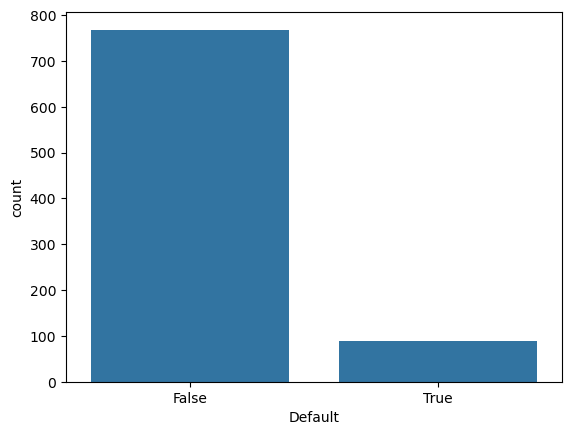

In [17]:
# Visualisation of this
sns.countplot(x="Default", data = df)

<Axes: xlabel='Default', ylabel='Debt'>

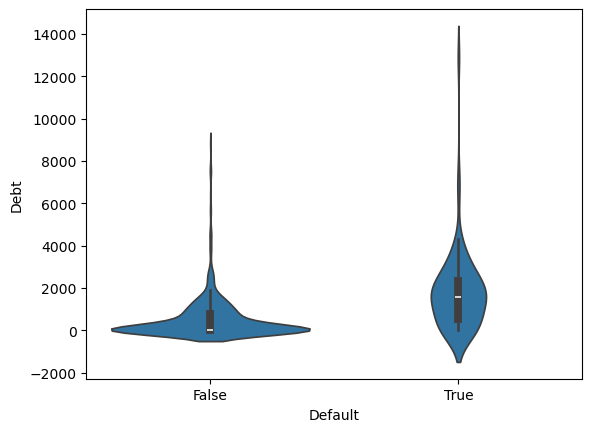

In [18]:
# Violin plot for debt
sns.violinplot(x="Default", y="Debt", data = df)

<Axes: xlabel='Default', ylabel='Score'>

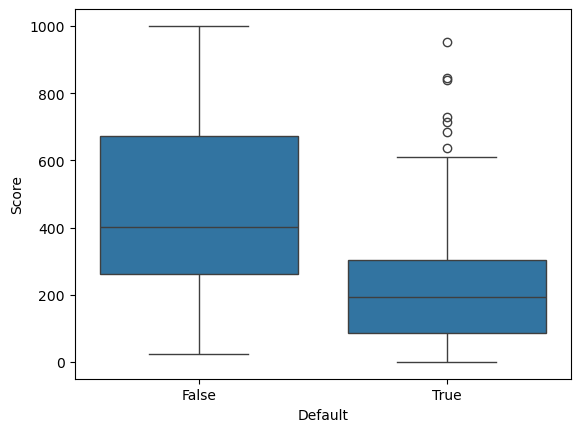

In [19]:
# # Box plot of credit score\
sns.boxplot(x="Default", y="Score", data=df)

<Axes: >

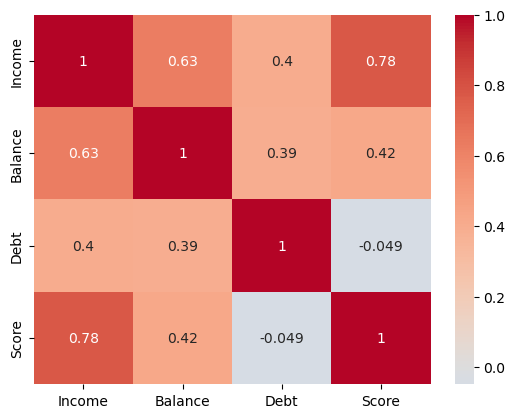

In [20]:
# Calling the correlation matrix on all numeric columns
sns.heatmap(df.iloc[:,:-1].corr(numeric_only=True), cmap="coolwarm", center=0.0, annot=True )

array([[<Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Balance', ylabel='Income'>,
        <Axes: xlabel='Debt', ylabel='Income'>,
        <Axes: xlabel='Score', ylabel='Income'>],
       [<Axes: xlabel='Income', ylabel='Balance'>,
        <Axes: xlabel='Balance', ylabel='Balance'>,
        <Axes: xlabel='Debt', ylabel='Balance'>,
        <Axes: xlabel='Score', ylabel='Balance'>],
       [<Axes: xlabel='Income', ylabel='Debt'>,
        <Axes: xlabel='Balance', ylabel='Debt'>,
        <Axes: xlabel='Debt', ylabel='Debt'>,
        <Axes: xlabel='Score', ylabel='Debt'>],
       [<Axes: xlabel='Income', ylabel='Score'>,
        <Axes: xlabel='Balance', ylabel='Score'>,
        <Axes: xlabel='Debt', ylabel='Score'>,
        <Axes: xlabel='Score', ylabel='Score'>]], dtype=object)

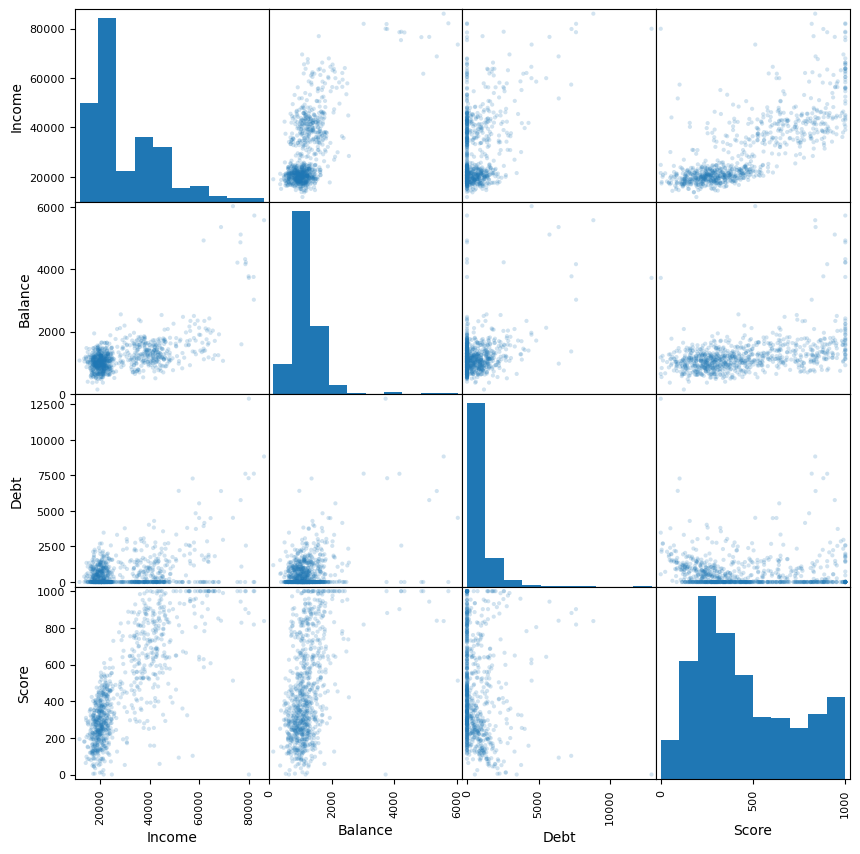

In [21]:
pd.plotting.scatter_matrix(df.iloc[:,:-1], alpha=0.2, figsize=(10,10))

## Exercise 3 - Data preparation

In [22]:
# Identify our null values
df.isna().sum()

Income      0
Term        0
Balance     0
Debt        0
Score      20
Default     0
dtype: int64

In [23]:
# dropping the 20 rows with Nan values
df.dropna(inplace = True)
df.describe().round()

,Income,Balance,Debt,Score
count,836.0,836.0,836.0,836.0
mean,29907.0,1219.0,648.0,451.0
std,14021.0,593.0,1154.0,269.0
min,11800.0,140.0,0.0,0.0
25%,19775.0,910.0,0.0,243.0
50%,22900.0,1120.0,71.0,376.0
75%,39025.0,1380.0,966.0,647.0
max,86000.0,6020.0,12891.0,1000.0


In [24]:
from sklearn import preprocessing
# Calling the label encoder
le = preprocessing.LabelEncoder()

#Fitting it to the target columns
le.fit(df["Default"])

# Creating a new column which will hold the old labels for us to inspect
# This column is unnecessary and will be dropped
# It is just for us to examine
df["old_labels"] = df["Default"]

# Transforming the target column
df["Default"] = le.transform(df.Default)
        

In [25]:
# We can examine the new column created alongside the old labels
df.sample(10)

,Income,Term,Balance,Debt,Score,Default,old_labels
201,16900.0,Short Term,1030.0,1045.0,218.0,0,False
108,21900.0,Short Term,990.0,0.0,429.0,0,False
772,49600.0,Long Term,2250.0,72.0,1000.0,0,False
241,17900.0,Short Term,1190.0,203.0,387.0,0,False
402,24200.0,Long Term,1130.0,1571.0,220.0,0,False
474,19900.0,Short Term,490.0,332.0,378.0,0,False
91,19800.0,Short Term,1370.0,694.0,363.0,0,False
266,20800.0,Long Term,660.0,0.0,367.0,0,False
649,34500.0,Short Term,1060.0,0.0,743.0,0,False
758,64000.0,Short Term,2420.0,0.0,1000.0,0,False


In [26]:
# We can drop the old labels column now
df.drop("old_labels", axis=1, inplace=True)

In [32]:
# Importing the required method
from sklearn.preprocessing import OrdinalEncoder

# Calling the encoder and specifying the order to encode
enc = OrdinalEncoder(categories = [["Short Term", "Long Term"]])

# Fitting it to a created column for the data, "Term_ordinal"
df["Term_ordinal"] = enc.fit_transform(df["Term"].values.reshape(-1, 1))

df.head()

,Income,Term,Balance,Debt,Score,Default,Term_ordinal
0,17500.0,Short Term,1460.0,272.0,225.0,0,0.0
1,18500.0,Long Term,890.0,970.0,187.0,0,1.0
2,20700.0,Short Term,880.0,884.0,85.0,0,0.0
4,24300.0,Short Term,1260.0,0.0,495.0,0,0.0
5,22900.0,Long Term,1540.0,1229.0,383.0,0,1.0


In [34]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(df[["Income",
                                                       "Balance",
                                                       "Debt",
                                                       "Score",
                                                       "Term_ordinal"]],
                                                   df["Default"],
                                                   test_size=0.3,
                                                   random_state=1)

In [36]:
# Assigning the columns to scale to a variable
cols_to_scale = ["Income", "Balance", "Debt", "Score"]

In [41]:
# Importing the package
from sklearn.preprocessing import StandardScaler

# Calling the method twice, once for the features and once for the target
scaler = StandardScaler()

#Fitting the scaler on the training features and applying it to both the training abd test data
# Note how the Scaler is only fit to the training set, but then applied to both
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [43]:
from sklearn.linear_model import LogisticRegression

cols = ["Income", "Balance", "Debt", "Score", "Term_ordinal"]
lr = LogisticRegression()
lr.fit(X_train[cols], y_train)

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

LogisticRegression()

In [57]:
y_pred_lr = lr.predict(X_train[cols])
# y_pred_lr

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

## Exercise 5 – Building a Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state = 42)

dt.fit(X_train[cols], y_train)

y_pred_dt = dt.predict(X_test[cols])
# y_pred_dt

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

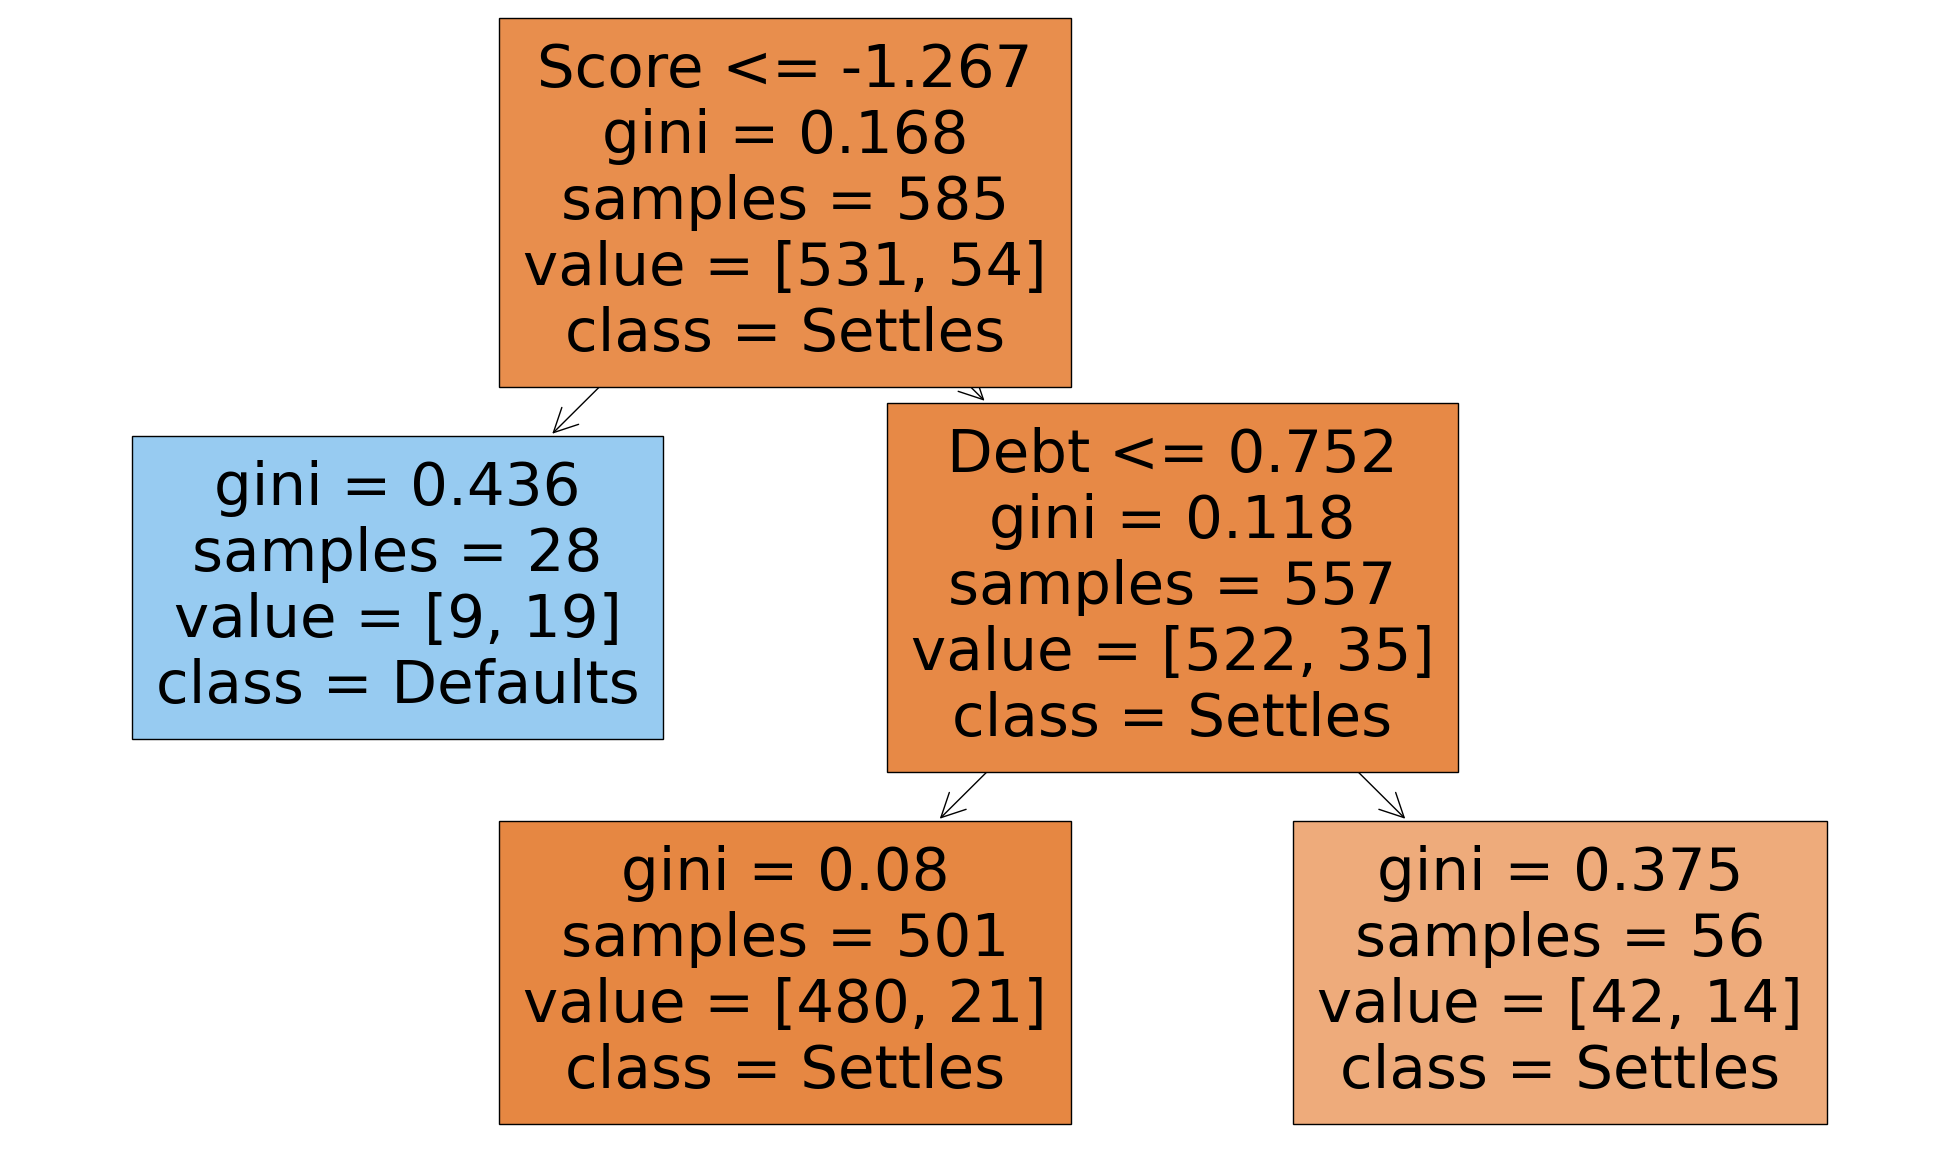

In [53]:
# Plotting the decision tree
# This plot shows us how the tree was built
# the data at each node
# The Gini values
    
# from sklearn import tree
# from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,15))
_ = plot_tree(dt, feature_names = X_train[cols].columns, class_names = ['Settles','Defaults'], filled=True)


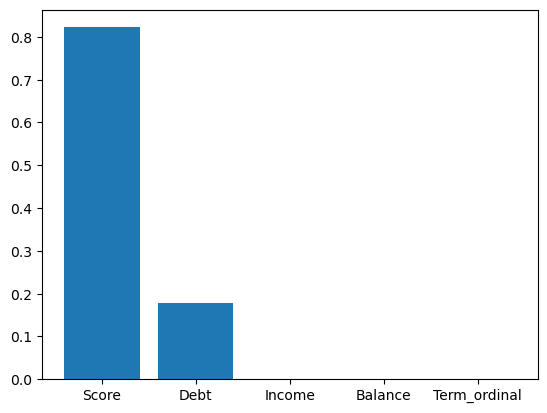

In [54]:
# extracting the feature importance of the model
# can be accessed by df.feature_importances_

# zipping together the feature anmes and their scores
f_i=list(zip(dt.feature_names_in_, dt.feature_importances_))

# sorting by scores, highest first
f_i.sort(key = lambda x : x[1], reverse=True)

# plotting these scores
plt.bar([x[0] for x in f_i], [x[1] for x in f_i])

plt.show()

## Exercise 6 – Building a Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

rf.fit(X_train[cols], y_train)

y_pred_rf = rf.predict(X_test[cols])

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

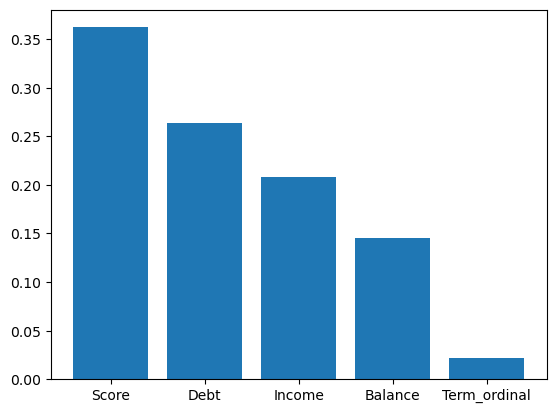

In [51]:
f_i = list(zip(rf.feature_names_in_, rf.feature_importances_))

f_i.sort(key = lambda x : x[1], reverse=True)

plt.bar([x[0] for x in f_i], [x[1] for x in f_i])

plt.show()

## Exercise 7 – Evaluating your models

Interpret the following elements of it:
• accuracy
• precision
• recall
• f1-score

In [65]:
from sklearn.metrics import classification_report

#print("Logistic Regression")
#print(classification_report(y_test, 
#                            y_pred_lr, 
#                            target_names=["Settles", "Defaults"]))

print("Decision Tree")
print(classification_report(y_test, 
                            y_pred_dt, 
                            target_names=["Settles", "Defaults"]))

print("Random Forest")
print(classification_report(y_test, 
                            y_pred_rf, 
                            target_names=["Settles", "Defaults"]))

Decision Tree
              precision    recall  f1-score   support

     Settles       0.90      0.99      0.94       219
    Defaults       0.80      0.25      0.38        32

    accuracy                           0.90       251
   macro avg       0.85      0.62      0.66       251
weighted avg       0.89      0.90      0.87       251

Random Forest
              precision    recall  f1-score   support

     Settles       0.92      1.00      0.96       219
    Defaults       1.00      0.41      0.58        32

    accuracy                           0.92       251
   macro avg       0.96      0.70      0.77       251
weighted avg       0.93      0.92      0.91       251



C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

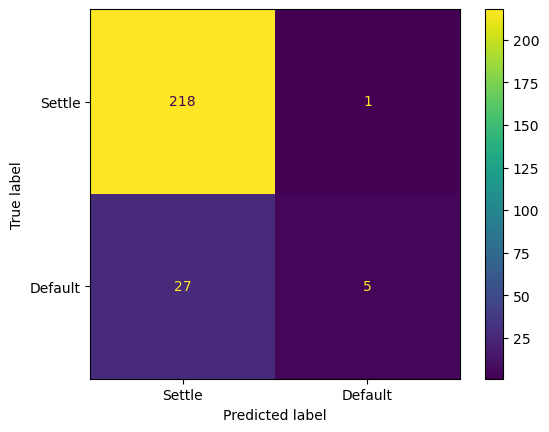

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
predictions = lr.predict(X_test[cols]) 
cm = confusion_matrix(y_test, predictions) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Settle','Default')) 
disp.plot();

              precision    recall  f1-score   support

     Settles       0.89      1.00      0.94       219
    Defaults       0.83      0.16      0.26        32

    accuracy                           0.89       251
   macro avg       0.86      0.58      0.60       251
weighted avg       0.88      0.89      0.85       251



C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\ProgramData\anaconda3\envs\pyds\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

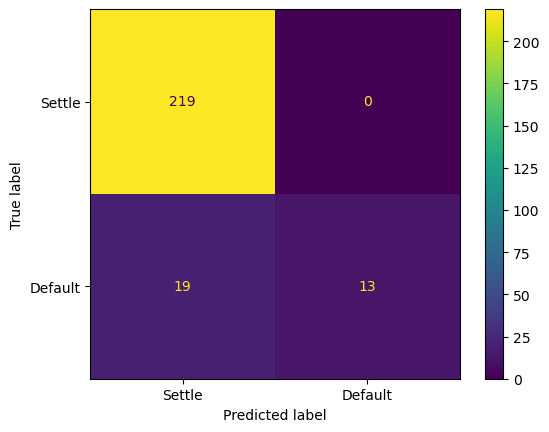

In [64]:
# Displaying precision and recall figures 
print(classification_report(y_test, predictions, target_names=["Settles", "Defaults"])) 

# PLotting the confusion matrix 
predictions = rf.predict(X_test[cols]) 

cm = confusion_matrix(y_test, predictions, labels=rf.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Settle','Default') ) 

disp.plot();

## Exercise 8 – Feature Engineering and Hyperparameter Tuning

In [ ]:
clf = ls.logisticRegression
